In [17]:
import matplotlib.pyplot as plt
import netCDF4
import xarray
import numpy
import time

# Concatenating Files

Using `xarray` we can concatenate \*.nc4 files into one large file for time series analysis and just as a sample for large data files. I use 9 full \*.nc4 files at 1.2GB each. I will time all of this to get an idea of how long this stuff takes.

__This takes a long time (>10min), so be sure you want to do this__

In [18]:
do_it = False
if do_it:
    # get first time measurement
    tic = time.perf_counter()
    # open all the data sets at once
    data = xarray.open_mfdataset('../.downloads/202008*.nc4', \
                           combine = 'by_coords', concat_dim="time")
    # save the opened files in one file
    data.to_netcdf('../.downloads/combined.nc4')
    data.close()
    # get second time measurement and print result
    toc = time.perf_counter()
    print(f"Concatenated 3.2GB in {toc - tic:0.4f} seconds")

# Access Speed comparison between single and multiple files

Using `xarray` to plot a time series of Bishkek for three days using the concatenated file and the single files.

In [19]:
%matplotlib inline

Plotted 3 days in 0.2343 seconds single file


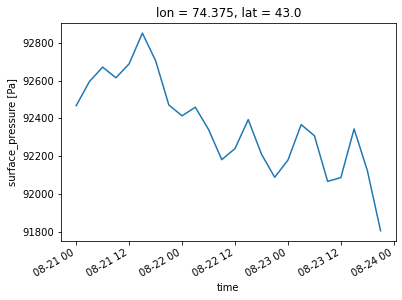

In [20]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_dataset('../.downloads/combined.nc4')  # NetCDF or OPeNDAP URL
lati = 42.8746; loni = 74.5698  # Bishkek

# Extract a dataset closest to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')

# select a variable to plot
dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds single file")

Plotted 3 days in 0.4839 seconds multiple files


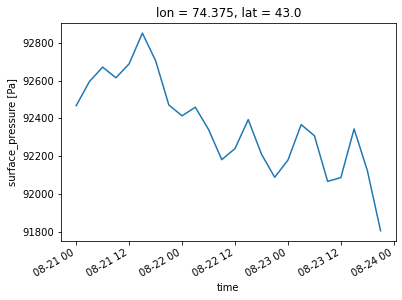

In [21]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/2020082*.nc4')  # NetCDF or OPeNDAP URL
lati = 42.8746; loni = 74.5698  # Bishkek

# Extract a dataset closest to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')

# select a variable to plot
dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds multiple files")

We see that accessing a single file is a lot faster, which is to be expected. I repeat this experiment without the graphing

In [22]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_dataset('../.downloads/combined.nc4')  # NetCDF or OPeNDAP URL
lati = 42.8746; loni = 74.5698  # Bishkek

# Extract a dataset closest to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')

# select a variable to plot
#dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds single file")

# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/2020082*.nc4')  # NetCDF or OPeNDAP URL
lati = 42.8746; loni = 74.5698  # Bishkek

# Extract a dataset closest to specified point
dsloc = ds.sel(lon=loni, lat=lati, method='nearest')

# select a variable to plot
#dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds multiple files")

Plotted 3 days in 0.0731 seconds single file
Plotted 3 days in 0.5219 seconds multiple files


Plotted 3 days in 0.2918 seconds one file


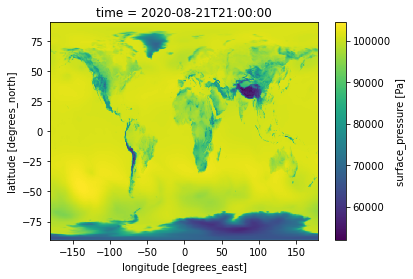

In [23]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/combined.nc4')  # NetCDF or OPeNDAP URL
#print(ds)
lati = 42.8746; loni = 74.5698  # Georges Bank

# Extract a dataset closest to specified point
dsloc = ds.sel(time='2020-08-21T21:00:00', method='nearest')

# select a variable to plot
dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds one file")

Plotted 3 days in 0.6026 seconds multiple files


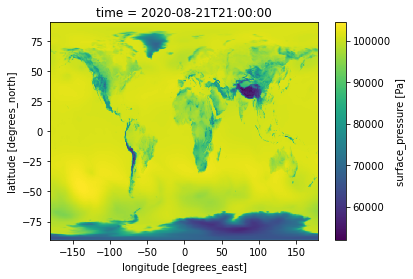

In [24]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/2020082*.nc4')  # NetCDF or OPeNDAP URL
#print(ds)
lati = 42.8746; loni = 74.5698  # Georges Bank

# Extract a dataset closest to specified point
dsloc = ds.sel(time='2020-08-21T21:00:00', method='nearest')

# select a variable to plot
dsloc['PS'].plot()
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds multiple files")

In [25]:
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/combined.nc4')  # NetCDF or OPeNDAP URL
#print(ds)
lati = 42.8746; loni = 74.5698  # Georges Bank

# Extract a dataset closest to specified point
dsloc = ds.sel(time='2020-08-21T21:00:00', method='nearest')

# select a variable to plot
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds one file")
# get first time measurement
tic = time.perf_counter()
ds = xarray.open_mfdataset('../.downloads/2020082*.nc4')  # NetCDF or OPeNDAP URL
#print(ds)
lati = 42.8746; loni = 74.5698  # Georges Bank

# Extract a dataset closest to specified point
dsloc = ds.sel(time='2020-08-21T21:00:00', method='nearest')

# select a variable to plot
ds.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"Plotted 3 days in {toc - tic:0.4f} seconds multiple files")

Plotted 3 days in 0.2891 seconds one file
Plotted 3 days in 0.3635 seconds multiple files


# Saving The File as NPY too

Using `numpy` to save the data as \*.npy on disk.

In [26]:
# get first time measurement
tic = time.perf_counter()
# load the large file using numpy
data = xarray.open_dataset("../.downloads/combined.nc4")
#print(data.to_array())
data.close()
# get second time measurement and print result
toc = time.perf_counter()
print(f"{toc - tic:0.4f} seconds")

0.0649 seconds


In [28]:
data = netCDF4.Dataset('../.downloads/combined.nc4', 'r')
print(data.variables)
data.close()

{'lon': <class 'netCDF4._netCDF4.Variable'>
float64 lon(lon)
    _FillValue: nan
    long_name: longitude
    units: degrees_east
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (576,)
filling on, 'lat': <class 'netCDF4._netCDF4.Variable'>
float64 lat(lat)
    _FillValue: nan
    long_name: latitude
    units: degrees_north
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (361,)
filling on, 'lev': <class 'netCDF4._netCDF4.Variable'>
float64 lev(lev)
    _FillValue: nan
    long_name: vertical level
    units: hPa
    positive: down
    coordinate: PLE
    standard_name: PLE_level
    vmax: 1000000000000000.0
    vmin: -1000000000000000.0
    valid_range: [-1.e+15  1.e+15]
unlimited dimensions: 
current shape = (42,)
filling on, 'time': <class 'netCDF4._netCDF4.Variable'>
int64 time(time)
    long_name: time
    time_inc

<ipython-input-28-02c0a05692c8>:2: DeprecationWarning: tostring() is deprecated. Use tobytes() instead.
  print(data.variables)
